<a href="https://colab.research.google.com/github/saeahgo/Large-Scale-Data-Algorithms-Forward-and-Backward-Elimination/blob/main/K_Means_Clustering_(Program_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-Means \
Implement the standard version of the K-Means algorithm as described in lecture. The initial starting points for the K cluster means can be K randomly selected data points. You should have an option to run the algorithm r times from r different randomly chosen initializations (e.g., r = 10), where you then select the solution that gives the lowest sum of squares error over the r runs. Run the algorithm for several different values of K and report the sum of squares error for each of these models. Please include a 2-d plot of several different iterations of your algorithm with the data points and clusters. 


1. Select K points as initial centroids
2. repeat \
3.    * Form K clusters by assigning each point to its closest centroid
4.    * Recompute the centroid of each cluter
5. until Centroids do not change

Try several K's and plot the sum of squares errors and get the elbow point with that (Sum of squares not decrease drastically). Then we can find the "optimal" K and write a report based on that.

# Library Used

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import seaborn as sns

# Load Data

In [ ]:
data = pd.read_csv("545_cluster_dataset programming 3.txt", header = None, delim_whitespace=True)
data = data.to_numpy(dtype=float)
#data['clusters'] = np.array([0 for k in range (data.shape[0])])
data

array([[-0.169513, -0.24397 ],
       [-1.462618, -1.333294],
       [ 0.769671,  0.849244],
       ...,
       [ 2.114334,  1.031347],
       [ 2.061401, -0.067838],
       [ 1.8857  ,  1.003853]])

# Each datapoint finds out which center is closest


To calculate WCSS, you first find the Euclidean distance (see figure below) between a given point and the centroid to which it is assigned. You then iterate this process for all points in the cluster, and then sum the values for the cluster and divide by the number of points. 

K is:  2
Sum of Square Error is:  3079.38180473777


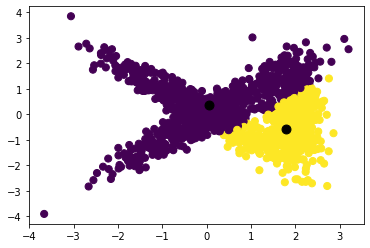

K is:  3
Sum of Square Error is:  2175.053772780615


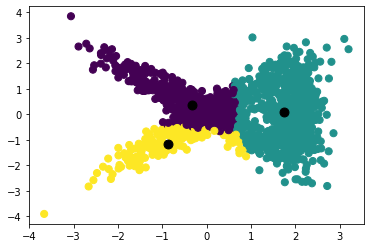

K is:  4
Sum of Square Error is:  2001.0212492328535


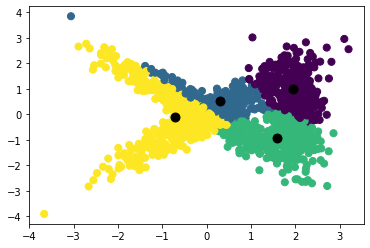

K is:  5
Sum of Square Error is:  1465.2813993897862


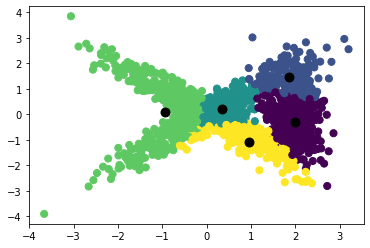

K is:  6
Sum of Square Error is:  1223.9055970589754


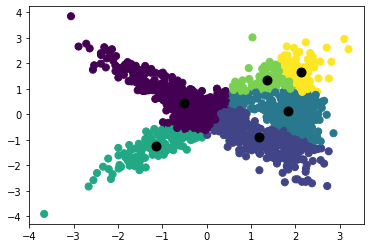

K is:  7
Sum of Square Error is:  1055.407114306801


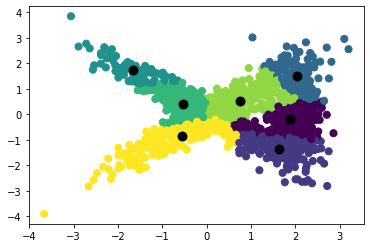

K is:  8
Sum of Square Error is:  950.2589774336577


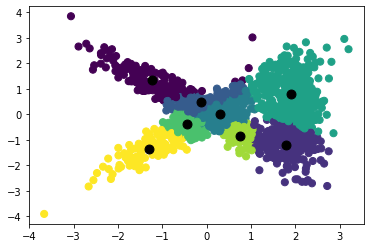

K is:  9
Sum of Square Error is:  831.3486548470503


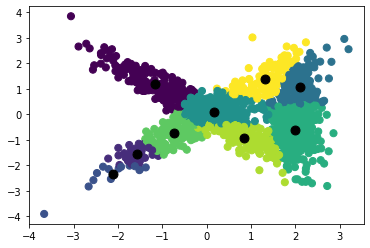

K is:  10
Sum of Square Error is:  671.9869398466221


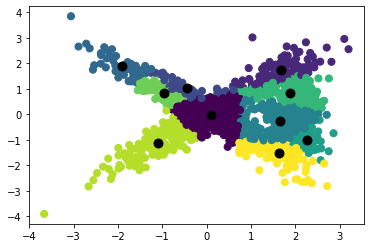

In [ ]:
k_min = 2
k_max = 11

r = 10

sum_of_squares_error = []
k_vis = []

for k in range(k_min, k_max, 1): # try multiple number of clusters (from 2 to 10)
  print("K is: ", k)
  result_tss = 1000000

  for round in range(r):

    # randomly guess K cluster center locations
    centroid_idx = np.random.choice(data.shape[0], k, replace=False)
    #centroid_idx
    centroid = data[centroid_idx]
    prev_centroid = centroid-1 
    tss = 0 # total sum of squares error

    if(np.sqrt(np.sum(np.power(centroid-prev_centroid,2))) < 0.000000001): 
      break

    clusters = np.array([0 for i in range(data.shape[0])])

    # each datapoint finds out which center is cloesest
    for i in range(data.shape[0]): 
      find_closest_dist = []

      # calculate Euclidean distance
      for j in range(centroid.shape[0]): 
        dist = np.linalg.norm(centroid[j]-data[i]) #np.sqrt(np.sum(np.power(centroid[j]-data[i],2))) #np.sqrt(np.power(centroid[j,0]-data[i,0],2)+np.power(centroid[j,1]-data[i,1],2)) 
        find_closest_dist = np.append(find_closest_dist, dist)

      # assign the minimum distance's cluster to cluster column 
      clusters[i] = np.argmin(find_closest_dist) 

      # update tss
      tss += np.power(min(find_closest_dist),2)
    
    if(tss < result_tss):
      result_tss = tss
      result_cluster = clusters
      result_centroid = centroid
    
    prev_centroid = centroid

    # update centroids
    for i in range(centroid.shape[0]):
      # selecting rows based on condition
      avg = np.mean(data[clusters == i], axis = 0)
      centroid[i] = avg

  print("Sum of Square Error is: ", result_tss)
  sum_of_squares_error = np.append(sum_of_squares_error, result_tss)
  k_vis = np.append(k_vis, k)

  #plotting the results
  plt.scatter(data[:,0], data[:,1], s = 50, c = result_cluster)
  plt.scatter(result_centroid[:,0], result_centroid[:,1], s = 80, color = 'black')
  plt.show()

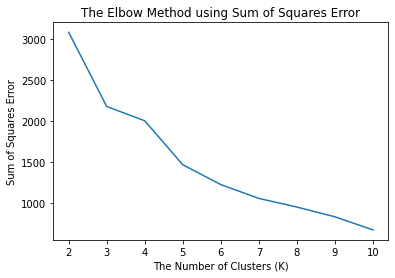

In [ ]:
# plot the sum of squares error
plt.plot(k_vis, sum_of_squares_error)
plt.xlabel('The Number of Clusters (K)')
plt.ylabel('Sum of Squares Error')
plt.title('The Elbow Method using Sum of Squares Error')
plt.show()